In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

from getConfig     import getConfig
from getModelParms import getParms
from evaluate      import evaluate

In [2]:
def getBaselinePreds(test):
    ''' The baseline ('naive') prediction is to use the value from 3 months ago as the guess.
    For predicting Volume this is "shiftedVol" and for Rev it's "shiftedRev" '''
    col = "shiftedVol" if label == "Volume" else "shiftedRev"
    baseline = test[col]
    return baseline

In [3]:
def loadParms(p):
    d = {'n_estimators': p[0],\
              'min_samples_split': p[1],\
              'max_depth': p[2],\
              "min_samples_leaf": p[3],\
              "max_features": p[4]}
    return d

In [4]:
config = getConfig()
df = pd.read_csv(config["dataLoc"]+config["fileName"])

In [5]:
lag = config["lagMonths"]
df["shiftedVol"]=df["Volume"].shift(periods=lag)
df["shiftedRev"]=df["Revenue"].shift(periods=lag)

df.dropna(inplace=True)

In [6]:
# Create Train and Test sets
trainSize = df.shape[0]-config["testMonths"]
train = df[:trainSize]
test  = df[trainSize:]

In [7]:
# Separate the features and labels
label = config["labelColumn"]

trainY = train[label]
testY  = test[label]

train.drop(columns=["Date", "Volume", "Revenue"], inplace=True)
test.drop(columns= ["Date", "Volume", "Revenue"], inplace=True)

/home/tbrownex/tensorflow/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
baseline = getBaselinePreds(test)

In [9]:
'''parms = getParms("RF")
for p in parms:
    parmDict = loadParms(p)'''

'parms = getParms("RF")\nfor p in parms:\n    parmDict = loadParms(p)'

In [10]:
regr = RandomForestRegressor(n_estimators=100)
rf   = regr.fit(train, trainY)

In [11]:
preds = rf.predict(test)
tmp = pd.DataFrame()
tmp["Baseline"] = baseline
tmp["RF"]       = preds
tmp["actual"]   = np.array(testY)
score = evaluate(tmp, False)
print("{:<12}{}".format("Model", "MAPE"))
print("{:<12}{:.3f}".format("Baseline", score["Baseline"]["mape"]))
print("{:<12}{:.3f}".format("RF", score["RF"]["mape"]))

Model       MAPE
Baseline    0.060
RF          0.060


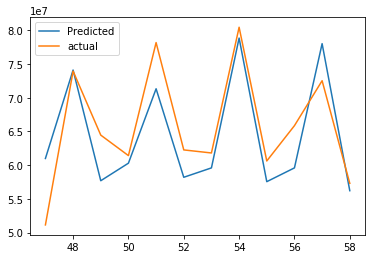

In [12]:
plt.plot(tmp["RF"], label="Predicted")
plt.plot(tmp["actual"], label="actual")
plt.legend()

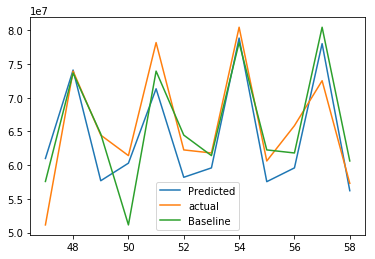

In [13]:
plt.plot(tmp["RF"], label="Predicted")
plt.plot(tmp["actual"], label="actual")
plt.plot(tmp["Baseline"], label="Baseline")
plt.legend()